<a href="https://colab.research.google.com/github/shresthgupta25/Sentiment-Analysis-of-Amazon-Product-Reviews-Using-Machine-Learning-Models/blob/main/amazon_data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import pickle
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
%pip install wordcloud

In [ ]:
#Load the data

data = pd.read_csv(r"/content/2111.txt", delimiter = '\t', quoting = 3)

print(f"Dataset shape : {data.shape}")


Dataset shape : (2769, 5)


In [ ]:
data.head()

,feedback,variation,date,rating,verified_reviews
0,0,Mamaearth-Onion-Growth-Control-Redensyl,2019-09-06 00:00:00,1,I bought this hair oil after viewing so many g...
1,1,Mamaearth-Onion-Growth-Control-Redensyl,2019-08-14 00:00:00,5,"""Used This Mama Earth Newly Launched Onion Oil..."
2,0,Mamaearth-Onion-Growth-Control-Redensyl,2019-10-19 00:00:00,1,So bad product...My hair falling increase too ...
3,0,Mamaearth-Onion-Growth-Control-Redensyl,2019-09-16 00:00:00,1,Product just smells similar to navarathna hair...
4,1,Mamaearth-Onion-Growth-Control-Redensyl,2019-08-18 00:00:00,5,I have been trying different onion oil for my ...


In [ ]:
#Column names

print(f"Feature names : {data.columns.values}")

Feature names : ['feedback' 'variation' 'date' 'rating' 'verified_reviews']


In [ ]:
#Check for null values

data.isnull().sum()

,0
feedback,0
variation,0
date,0
rating,0
verified_reviews,6


In [ ]:

data.isnull().sum()

,0
feedback,0
variation,0
date,0
rating,0
verified_reviews,6


In [ ]:
#Getting the record where 'verified_reviews' is null

data[data['verified_reviews'].isna() == True]

,feedback,variation,date,rating,verified_reviews
2238,1,Tata-Tea-Gold-500g,2018-03-03 00:00:00,4,NaN
2248,1,Tata-Tea-Gold-500g,2018-03-03 00:00:00,4,NaN
2621,1,Mysore-Sandal-Bathing-Soap-125g,2020-05-22 00:00:00,4,NaN
2624,1,Mysore-Sandal-Bathing-Soap-125g,2020-09-24 00:00:00,5,NaN
2631,1,Mysore-Sandal-Bathing-Soap-125g,2020-05-22 00:00:00,4,NaN
2634,1,Mysore-Sandal-Bathing-Soap-125g,2020-09-24 00:00:00,5,NaN


In [ ]:
#We will drop the null record

data.dropna(inplace=True)

In [ ]:
print(f"Dataset shape after dropping null values : {data.shape}")

Dataset shape after dropping null values : (2763, 5)


In [ ]:
data['length'] = data['verified_reviews'].apply(len)

In [ ]:
data.head()

,feedback,variation,date,rating,verified_reviews,length
0,0,Mamaearth-Onion-Growth-Control-Redensyl,2019-09-06 00:00:00,1,I bought this hair oil after viewing so many g...,477
1,1,Mamaearth-Onion-Growth-Control-Redensyl,2019-08-14 00:00:00,5,"""Used This Mama Earth Newly Launched Onion Oil...",497
2,0,Mamaearth-Onion-Growth-Control-Redensyl,2019-10-19 00:00:00,1,So bad product...My hair falling increase too ...,149
3,0,Mamaearth-Onion-Growth-Control-Redensyl,2019-09-16 00:00:00,1,Product just smells similar to navarathna hair...,518
4,1,Mamaearth-Onion-Growth-Control-Redensyl,2019-08-18 00:00:00,5,I have been trying different onion oil for my ...,360


In [ ]:
#Randomly checking for 10th record

print(f"'verified_reviews' column value: {data.iloc[10]['verified_reviews']}") #Original value
print(f"Length of review : {len(data.iloc[10]['verified_reviews'])}") #Length of review using len()
print(f"'length' column value : {data.iloc[10]['length']}") #Value of the column 'length'

'verified_reviews' column value: I bought this hair oil after viewing so many good comments. But this product is not good enough.First of all it's Expensive...Second thing the amount of the product is low (half bottle) YES!The bottle is not completely filled with oil. If you cheating on your customers #Mamaearth trust me on this you can't fool people more than once. Now I know that your Brand is not good enough. I am not going to buy any product from your Brand again.Thumbs down for mamaearth onion oil !!
Length of review : 477
'length' column value : 477


In [ ]:
data.dtypes

,0
feedback,int64
variation,object
date,object
rating,int64
verified_reviews,object
length,int64


analysing rating column


In [ ]:
len(data)

2763

In [ ]:
print(f"Rating value count: \n{data['rating'].value_counts()}")

Rating value count: 
rating
5    1433
1     544
4     460
3     198
2     128
Name: count, dtype: int64



Let's plot the above values in a bar graph


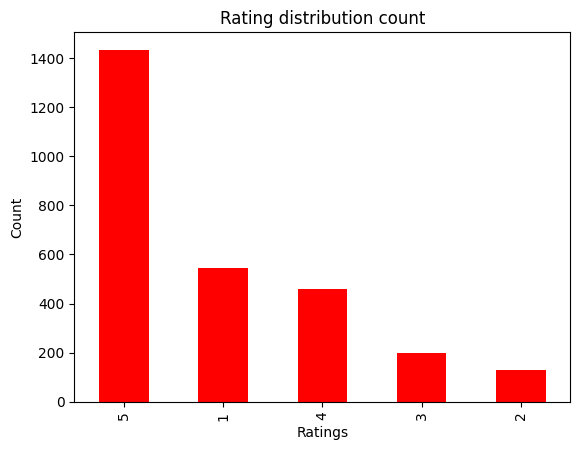

In [ ]:
#Bar plot to visualize the total counts of each rating

data['rating'].value_counts().plot.bar(color = 'red')
plt.title('Rating distribution count')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

In [ ]:
#Finding the percentage distribution of each rating - we'll divide the number of records for each rating by total number of records

print(f"Rating value count - percentage distribution: \n{round(data['rating'].value_counts()/data.shape[0]*100,2)}")

Rating value count - percentage distribution: 
rating
5    51.86
1    19.69
4    16.65
3     7.17
2     4.63
Name: count, dtype: float64


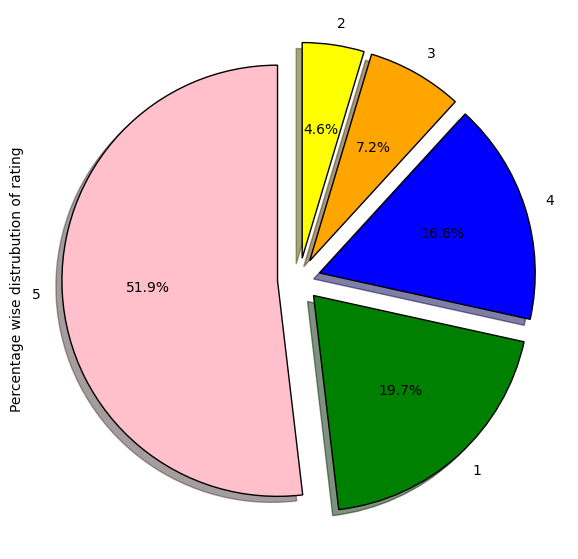

In [ ]:

fig = plt.figure(figsize=(7,7))

colors = ('pink', 'green', 'blue','orange','yellow')

wp = {'linewidth':1, "edgecolor":'black'}

tags = data['rating'].value_counts()/data.shape[0]

explode=(0.1,0.1,0.1,0.1,0.1)

tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distrubution of rating')

from io import  BytesIO

graph = BytesIO()

fig.savefig(graph, format="png")

Analyzing 'feedback' column

In [ ]:
#Distinct values of 'feedback' and its count

print(f"Feedback value count: \n{data['feedback'].value_counts()}")

Feedback value count: 
feedback
1    2091
0     672
Name: count, dtype: int64


In [ ]:
#Extracting the 'verified_reviews' value for one record with feedback = 0

review_0 = data[data['feedback'] == 0].iloc[1]['verified_reviews']
print(review_0)

So bad product...My hair falling increase too much..I order shampoo mask and oil.. nothing stop hairfallAfter 3 to 4 wash my hair falling so badly...


In [ ]:
#Extracting the 'verified_reviews' value for one record with feedback = 1

review_1 = data[data['feedback'] == 1].iloc[1]['verified_reviews']
print(review_1)

I have been trying different onion oil for my hair as my hair is not very healthy. This product has literally changed the texture of my scalp and I am really happy with the results. It comes in a nice colorful packaging too. Definitely recommend this one to everyone looking out for onion oil.  For more reviews you can follow me on Instagram @insi_lovemyself.


From the above 2 examples we can see that feedback 0 is negative review and 1 is positive review

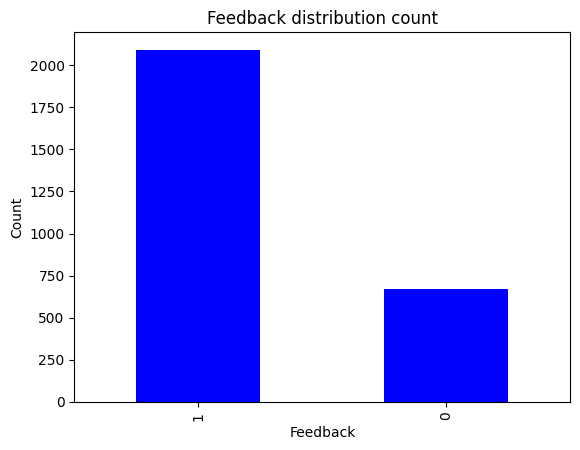

In [ ]:
#Bar graph to visualize the total counts of each feedback

data['feedback'].value_counts().plot.bar(color = 'blue')
plt.title('Feedback distribution count')
plt.xlabel('Feedback')
plt.ylabel('Count')
plt.show()

In [ ]:
#Finding the percentage distribution of each feedback - we'll divide the number of records for each feedback by total number of records

print(f"Feedback value count - percentage distribution: \n{round(data['feedback'].value_counts()/data.shape[0]*100,2)}")

Feedback value count - percentage distribution: 
feedback
1    75.68
0    24.32
Name: count, dtype: float64


<Axes: ylabel='Percentage wise distrubution of feedback'>

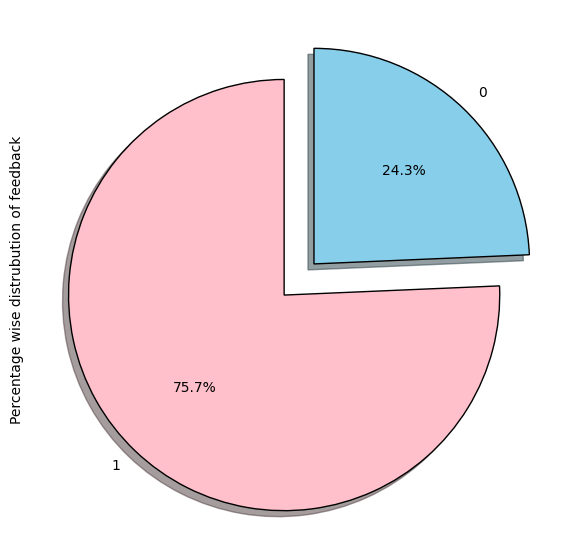

In [ ]:
fig = plt.figure(figsize=(7,7))

colors = ('pink', 'skyblue')

wp = {'linewidth':1, "edgecolor":'black'}

tags = data['feedback'].value_counts()/data.shape[0]

explode=(0.1,0.1)

tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distrubution of feedback')

In [ ]:

#Feedback = 0
data[data['feedback'] == 0]['rating'].value_counts()

,count
rating,
1,544
2,128


In [ ]:
#Feedback = 1
data[data['feedback'] == 1]['rating'].value_counts()

,count
rating,
5,1433
4,460
3,198


If rating of a review is 1 or 2 then the feedback is 0 (negative) and if the rating is 3, 4 or 5 then the feedback is 1 (positive).

In [ ]:
#Distinct values of 'variation' and its count

print(f"Variation value count: \n{data['variation'].value_counts()}")

Variation value count: 
variation
Tata-Tea-Gold-500g                           58
Cinthol-Original-Soap-100g-Pack              40
Dettol-Liquid-Refill-Original-1500           40
Himalaya-Moisturizing-Aloe-Vera-200ml        40
Society-Tea-Masala-Jar-250g                  40
                                             ..
Patanjali-UHT-Milk-1000-ml                   10
Indiana-Frutti-Cherries-Frooti-Multicolor     6
Amul-Cow-Ghee-500ml                           4
Tata-Tea-Premium-1-5kg                        2
Patanjali-Ayurved-Ltd-CORO-NIL-Tablet         2
Name: count, Length: 122, dtype: int64


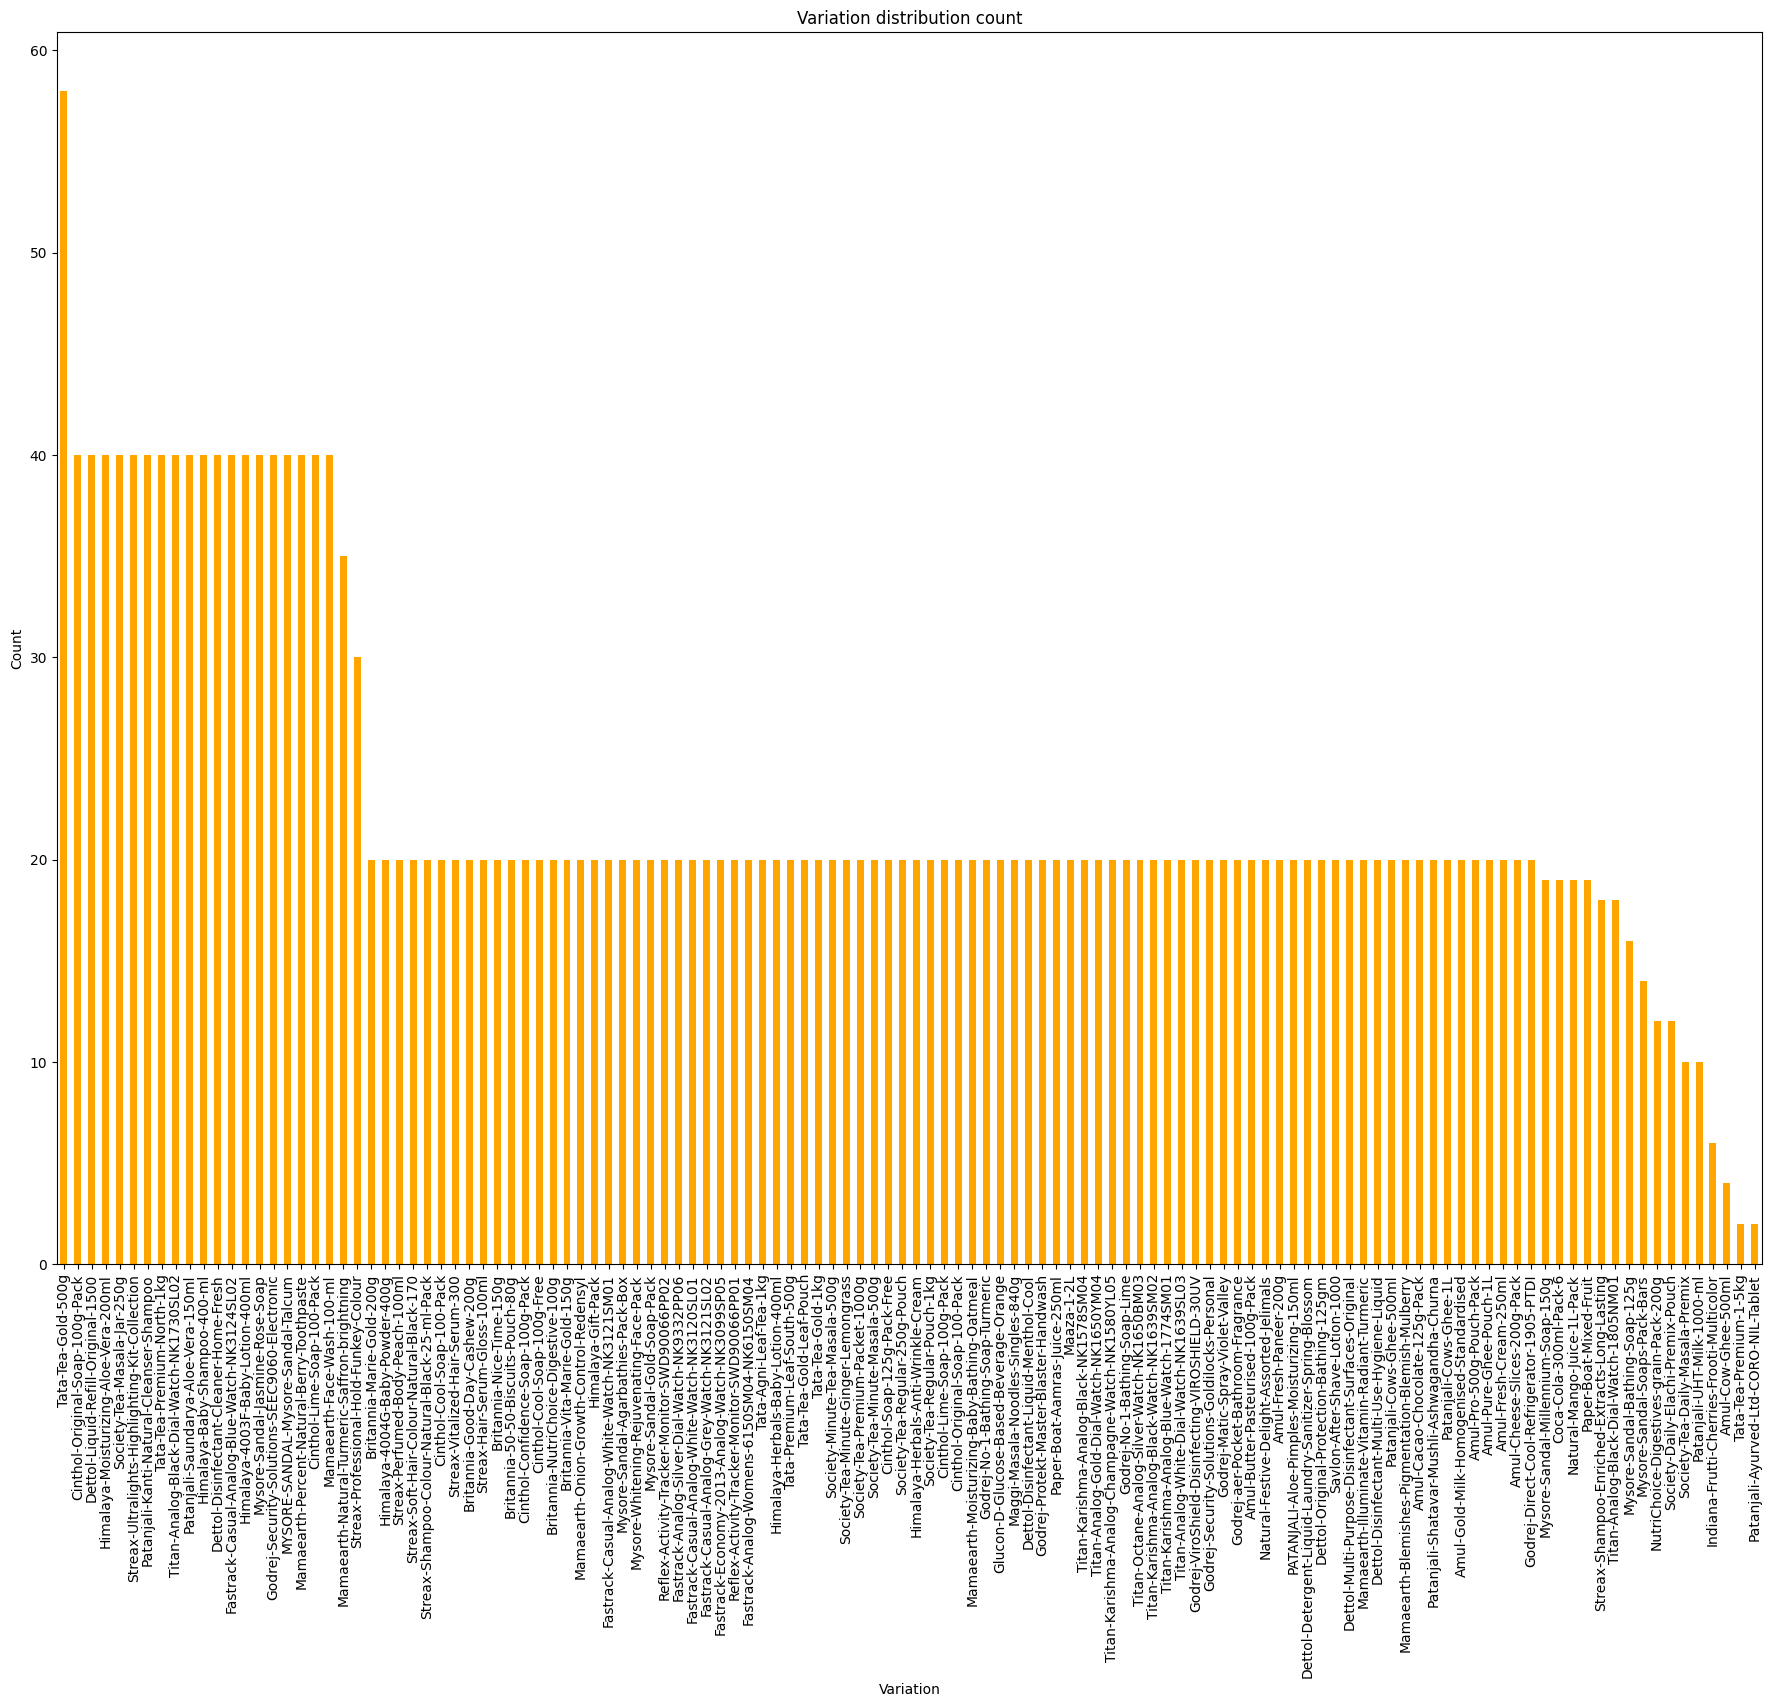

In [ ]:
#Bar graph to visualize the total counts of each variation

data['variation'].value_counts().plot.bar(color = 'orange',figsize=(22, 16))
plt.title('Variation distribution count')
plt.xlabel('Variation')
plt.ylabel('Count')
plt.show()

In [ ]:
#Finding the percentage distribution of each variation - we'll divide the number of records for each variation by total number of records

print(f"Variation value count - percentage distribution: \n{round(data['variation'].value_counts()/data.shape[0]*100,2)}")

Variation value count - percentage distribution: 
variation
Tata-Tea-Gold-500g                           2.10
Cinthol-Original-Soap-100g-Pack              1.45
Dettol-Liquid-Refill-Original-1500           1.45
Himalaya-Moisturizing-Aloe-Vera-200ml        1.45
Society-Tea-Masala-Jar-250g                  1.45
                                             ... 
Patanjali-UHT-Milk-1000-ml                   0.36
Indiana-Frutti-Cherries-Frooti-Multicolor    0.22
Amul-Cow-Ghee-500ml                          0.14
Tata-Tea-Premium-1-5kg                       0.07
Patanjali-Ayurved-Ltd-CORO-NIL-Tablet        0.07
Name: count, Length: 122, dtype: float64


In [ ]:
#Mean rating according to variation
data.groupby('variation')['rating'].mean()

,rating
variation,
Amul-Butter-Pasteurised-100g-Pack,4.1
Amul-Cacao-Chocolate-125g-Pack,4.9
Amul-Cheese-Slices-200g-Pack,4.6
Amul-Cow-Ghee-500ml,3.5
Amul-Fresh-Cream-250ml,4.0
...,...
Titan-Karishma-Analog-Black-NK1578SM04,4.3
Titan-Karishma-Analog-Black-Watch-NK1639SM02,4.5
Titan-Karishma-Analog-Blue-Watch-1774SM01,3.4


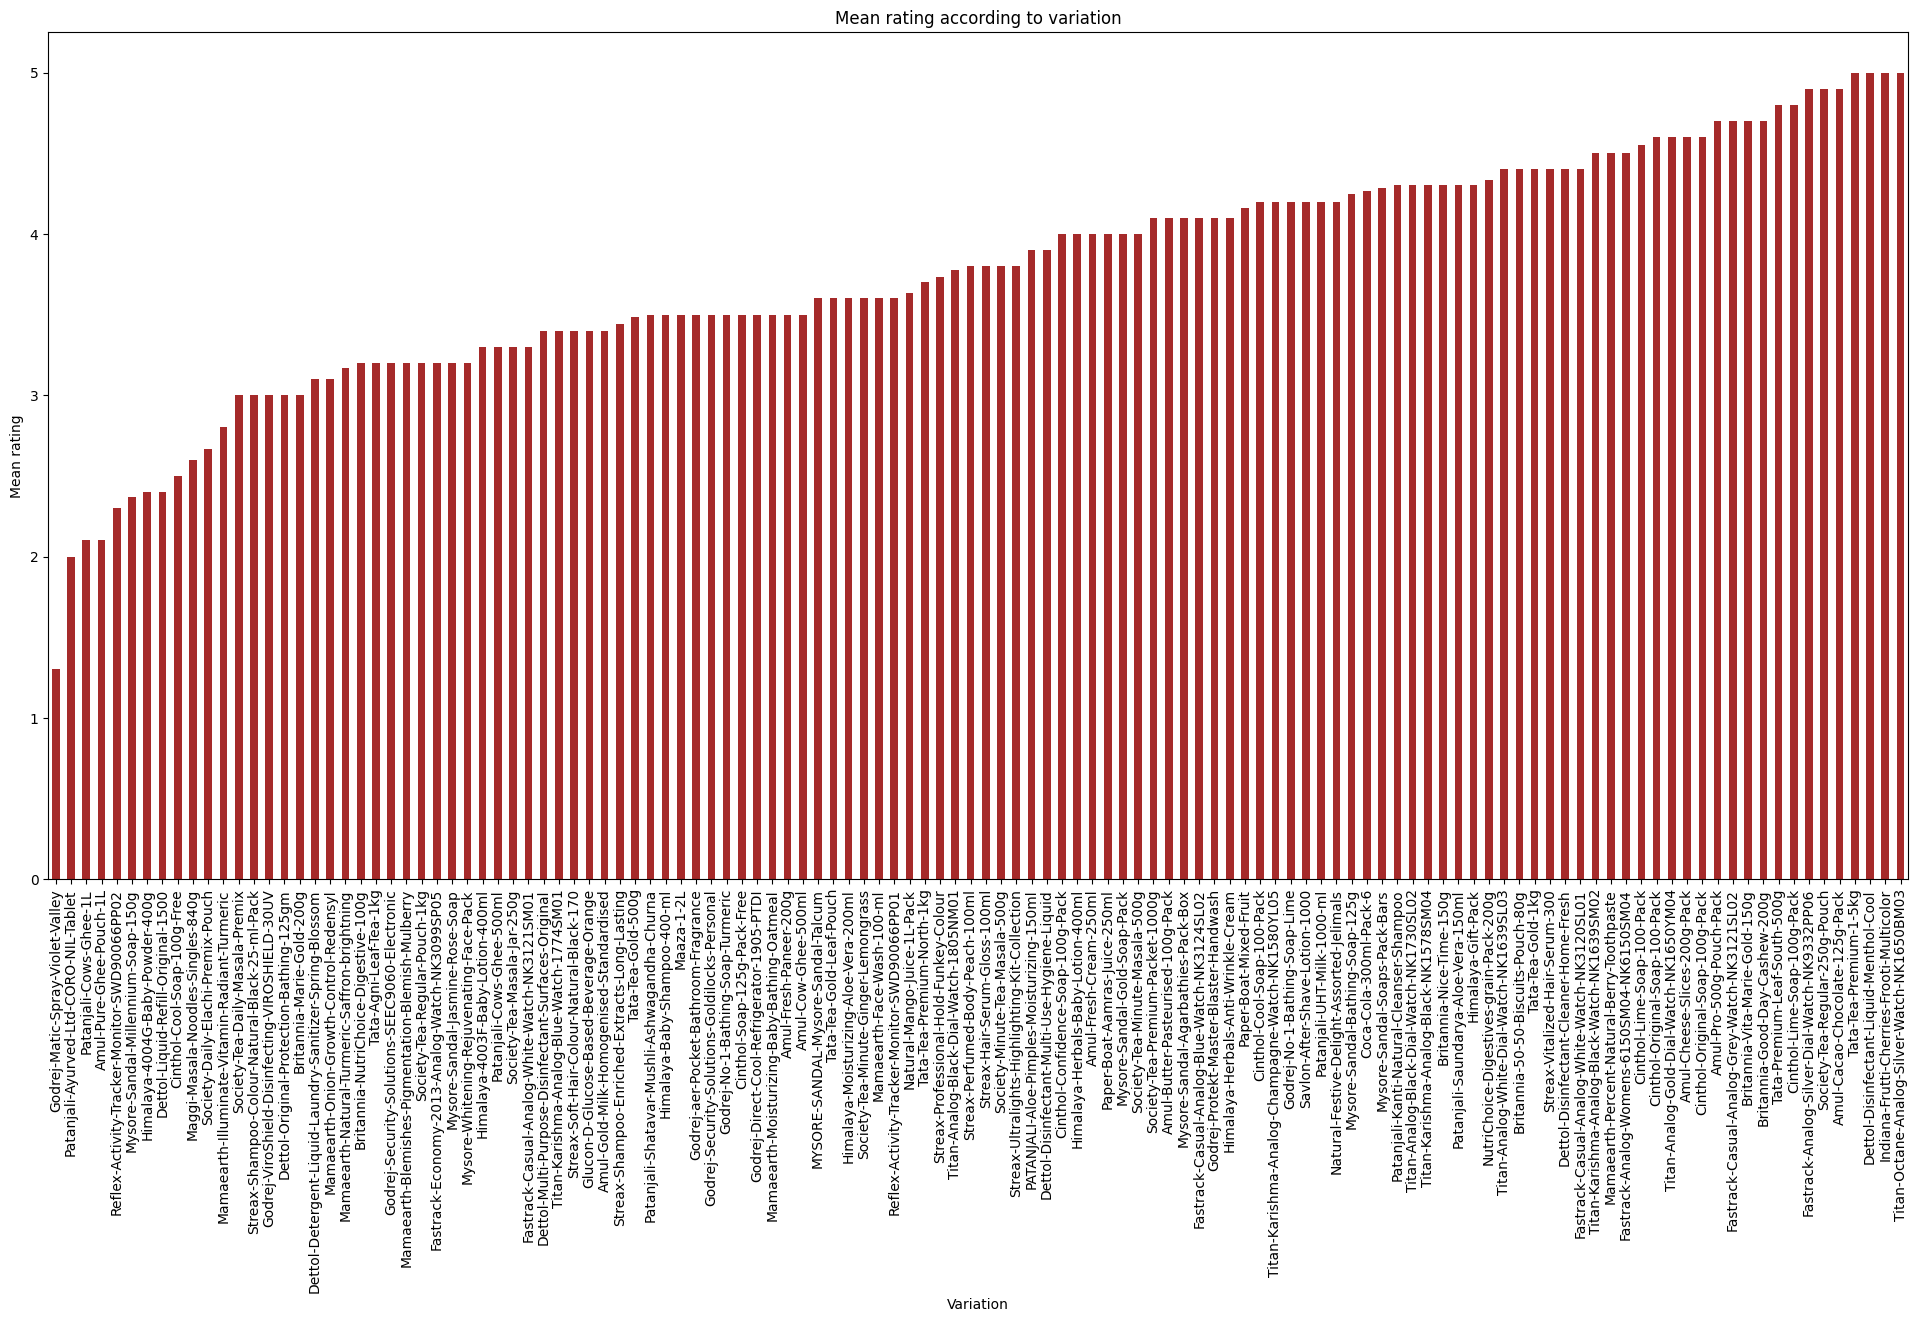

In [ ]:
data.groupby('variation')['rating'].mean().sort_values().plot.bar(color = 'brown', figsize=(24, 11))
plt.title("Mean rating according to variation")
plt.xlabel('Variation')
plt.ylabel('Mean rating')
plt.show()


Analyzing 'verified_reviews' column
This column contains the textual review given by the user for a variation for the product.

In [ ]:
data['length'].describe()

,length
count,2763.000000
mean,222.631560
std,238.461988
min,2.000000
25%,57.500000
50%,159.000000
75%,312.000000
max,1866.000000


[Text(0.5, 1.0, 'Distribution of length of review ')]

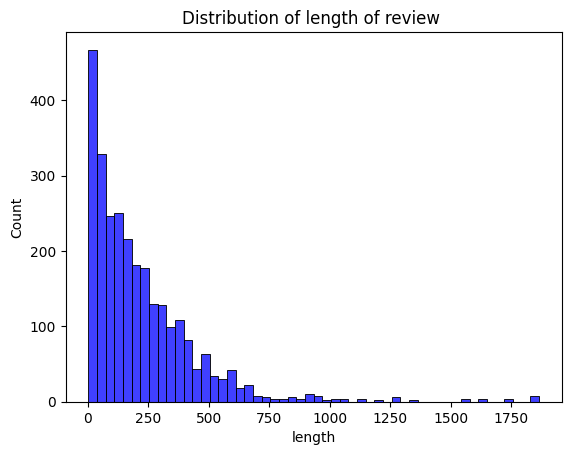

In [ ]:
sns.histplot(data['length'],color='blue').set(title='Distribution of length of review ')

[Text(0.5, 1.0, 'Distribution of length of review if feedback = 0')]

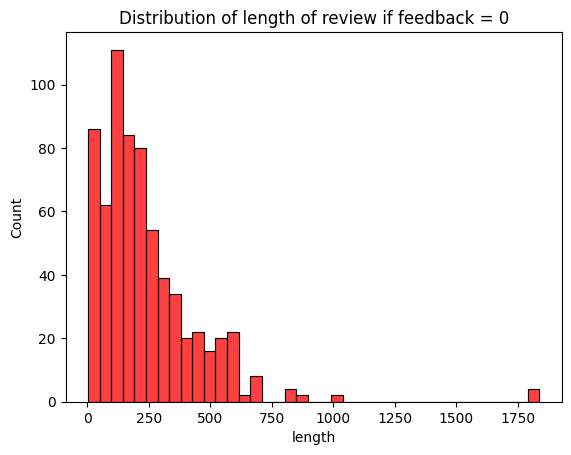

In [ ]:

#Length analysis when feedback is 0 (negative)

sns.histplot(data[data['feedback']==0]['length'],color='red').set(title='Distribution of length of review if feedback = 0')

[Text(0.5, 1.0, 'Distribution of length of review if feedback = 1')]

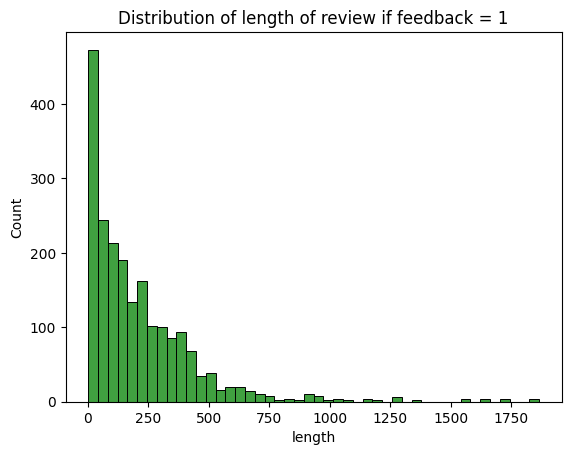

In [ ]:
sns.histplot(data[data['feedback']==1]['length'],color='green').set(title='Distribution of length of review if feedback = 1')

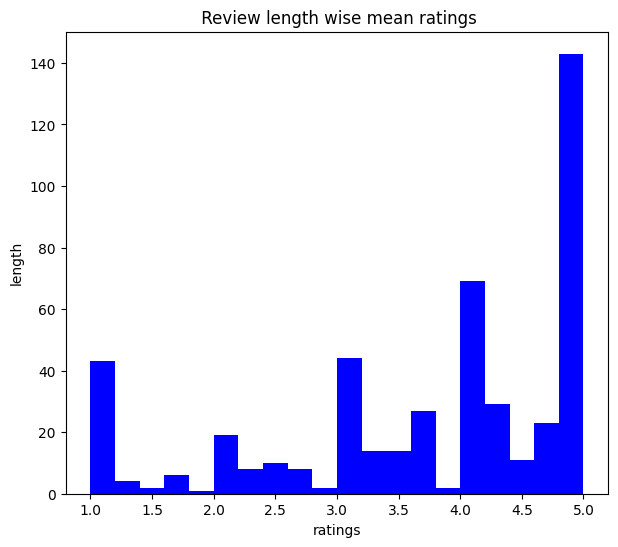

In [ ]:
#Lengthwise mean rating

data.groupby('length')['rating'].mean().plot.hist(color = 'blue', figsize=(7, 6), bins = 20)
plt.title(" Review length wise mean ratings")
plt.xlabel('ratings')
plt.ylabel('length')
plt.show()

In [ ]:
cv = CountVectorizer(stop_words='english')
words = cv.fit_transform(data.verified_reviews)

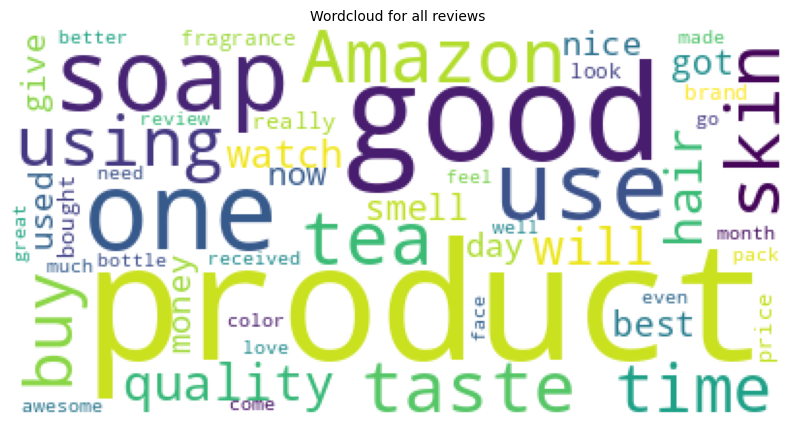

In [ ]:
# Combine all reviews
reviews = " ".join([review for review in data['verified_reviews']])

# Initialize wordcloud object
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title('Wordcloud for all reviews', fontsize=10)
plt.axis('off')
plt.show()

In [ ]:
# Combine all reviews for each feedback category and splitting them into individual words
neg_reviews = " ".join([review for review in data[data['feedback'] == 0]['verified_reviews']])
neg_reviews = neg_reviews.lower().split()

pos_reviews = " ".join([review for review in data[data['feedback'] == 1]['verified_reviews']])
pos_reviews = pos_reviews.lower().split()

#Finding words from reviews which are present in that feedback category only
unique_negative = [x for x in neg_reviews if x not in pos_reviews]
unique_negative = " ".join(unique_negative)

unique_positive = [x for x in pos_reviews if x not in neg_reviews]
unique_positive = " ".join(unique_positive)

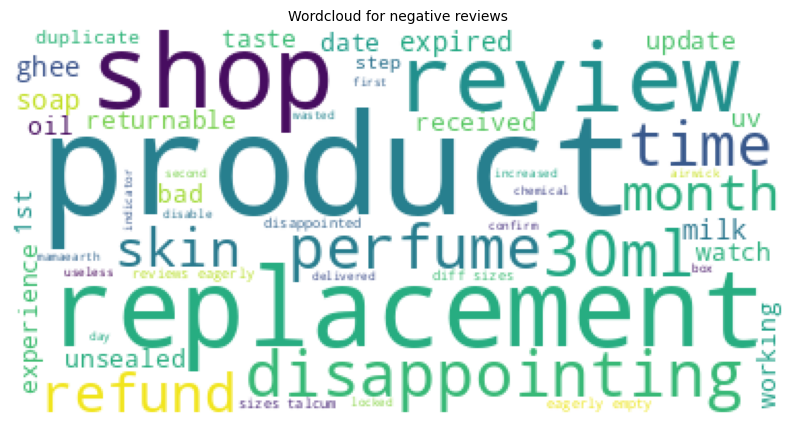

In [ ]:
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_negative))
plt.title('Wordcloud for negative reviews', fontsize=10)
plt.axis('off')
plt.show()

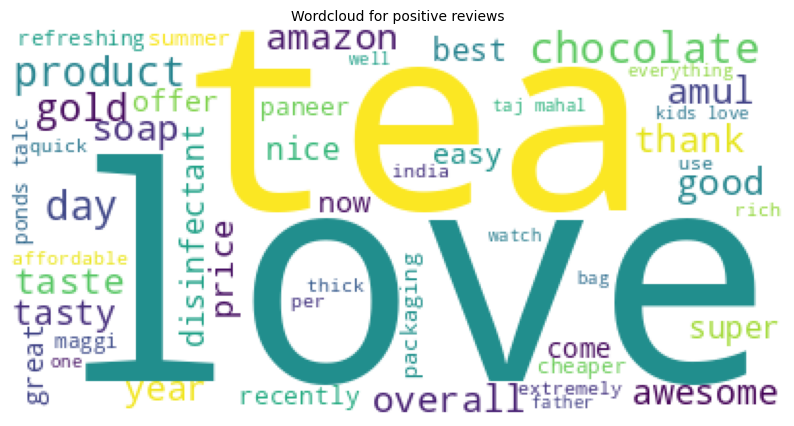

In [ ]:
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_positive))
plt.title('Wordcloud for positive reviews', fontsize=10)
plt.axis('off')
plt.show()


Preprocessing and Modelling
To build the corpus from the 'verified_reviews' we perform the following -

1. Replace any non alphabet characters with a space
2. Covert to lower case and split into words
3. Iterate over the individual words and if it is not a stopword then add the stemmed form of the word to the corpus

In [ ]:
corpus = []
stemmer = PorterStemmer()
for i in range(0, data.shape[0]):
  review = re.sub('[^a-zA-Z]', ' ', data.iloc[i]['verified_reviews'])
  review = review.lower().split()
  review = [stemmer.stem(word) for word in review if not word in STOPWORDS]
  review = ' '.join(review)
  corpus.append(review)

In [ ]:
#using Count Vectorizer to create bag of words

cv = CountVectorizer(max_features = 2500)

#Storing independent and dependent variables in X and y
X = cv.fit_transform(corpus).toarray()
y = data['feedback'].values

In [ ]:
#Saving the Count Vectorizer
pickle.dump(cv, open("/content/sample_data/countVectorizer.pkl", 'wb'))

In [ ]:
#Checking the shape of X and y

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (2763, 2500)
y shape: (2763,)


In [ ]:
#Splitting data into train and test set with 30% data with testing.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 15)

print(f"X train: {X_train.shape}")
print(f"y train: {y_train.shape}")
print(f"X test: {X_test.shape}")
print(f"y test: {y_test.shape}")

X train: (1934, 2500)
y train: (1934,)
X test: (829, 2500)
y test: (829,)


In [ ]:
print(f"X train max value: {X_train.max()}")
print(f"X test max value: {X_test.max()}")

X train max value: 19
X test max value: 16


In [ ]:
#We'll scale X_train and X_test so that all values are between 0 and 1.

scaler = MinMaxScaler()

X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)

In [ ]:
#Saving the scaler model
pickle.dump(scaler, open("/content/sample_data/scaler.pkl", 'wb'))

In [ ]:
#random Forest
#Fitting scaled X_train and y_train on Random Forest Classifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train_scl, y_train)

RandomForestClassifier()

In [ ]:
#Accuracy of the model on training and testing data

print("Training Accuracy :", model_rf.score(X_train_scl, y_train))
print("Testing Accuracy :", model_rf.score(X_test_scl, y_test))

Training Accuracy : 0.9963805584281282
Testing Accuracy : 0.9674306393244874


In [ ]:
#Predicting on the test set
y_preds = model_rf.predict(X_test_scl)

In [ ]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_preds)



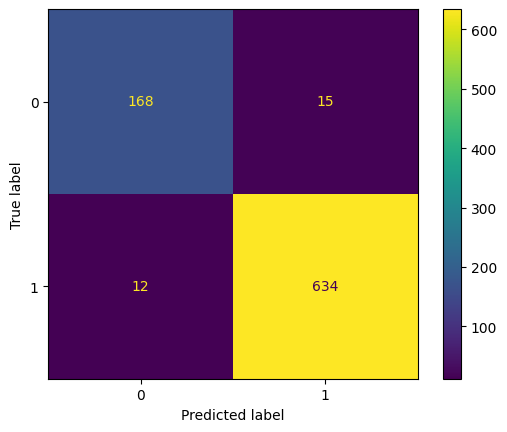

In [ ]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_rf.classes_)
cm_display.plot()
plt.show()

In [ ]:
#K fold cross-validation

accuracies = cross_val_score(estimator = model_rf, X = X_train_scl, y = y_train, cv = 10)

print("Accuracy :", accuracies.mean())
print("Standard Variance :", accuracies.std())

Accuracy : 0.9555365632177768
Standard Variance : 0.014087897580145227


In [ ]:
#Applying grid search to get the optimal parameters on random forest

params = {
    'bootstrap': [True],
    'max_depth': [80, 100],
    'min_samples_split': [8, 12],
    'n_estimators': [100, 300]
}


cv_object = StratifiedKFold(n_splits = 2)

grid_search = GridSearchCV(estimator = model_rf, param_grid = params, cv = cv_object, verbose = 0, return_train_score = True)
grid_search.fit(X_train_scl, y_train.ravel())

GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'max_depth': [80, 100],
                         'min_samples_split': [8, 12],
                         'n_estimators': [100, 300]},
             return_train_score=True)

In [ ]:
#Getting the best parameters from the grid search


print("Best Parameter Combination : {}".format(grid_search.best_params_))



print("Cross validation mean accuracy on train set : {}".format(grid_search.cv_results_['mean_train_score'].mean()*100))
print("Cross validation mean accuracy on test set : {}".format(grid_search.cv_results_['mean_test_score'].mean()*100))
print("Accuracy score for test set :", accuracy_score(y_test, y_preds))

Best Parameter Combination : {'bootstrap': True, 'max_depth': 80, 'min_samples_split': 8, 'n_estimators': 300}
Cross validation mean accuracy on train set : 97.55041365046534
Cross validation mean accuracy on test set : 89.77507755946226
Accuracy score for test set : 0.9674306393244874


In [ ]:
#XgBoost
model_xgb = XGBClassifier()
model_xgb.fit(X_train_scl, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
#Accuracy of the model on training and testing data

print("Training Accuracy :", model_xgb.score(X_train_scl, y_train))
print("Testing Accuracy :", model_xgb.score(X_test_scl, y_test))

Training Accuracy : 0.9751809720785936
Testing Accuracy : 0.9396863691194209


In [ ]:
y_preds = model_xgb.predict(X_test)


[[151  32]
 [ 20 626]]


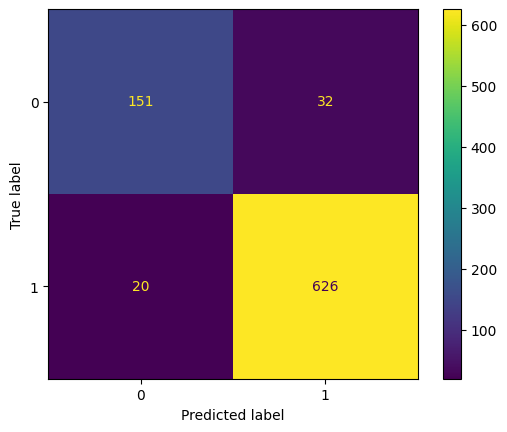

In [ ]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_preds)
print(cm)



cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_xgb.classes_)
cm_display.plot()
plt.show()

Decision Tree Classifier



In [ ]:

model_dt = DecisionTreeClassifier()
model_dt.fit(X_train_scl, y_train)


DecisionTreeClassifier()

In [ ]:
#Accuracy of the model on training and testing data

print("Training Accuracy :", model_dt.score(X_train_scl, y_train))
print("Testing Accuracy :", model_dt.score(X_test_scl, y_test))

Training Accuracy : 0.9963805584281282
Testing Accuracy : 0.962605548854041


In [ ]:
y_preds = model_dt.predict(X_test)
#Confusion Matrix
cm = confusion_matrix(y_test, y_preds)
print(cm)

[[172  11]
 [144 502]]


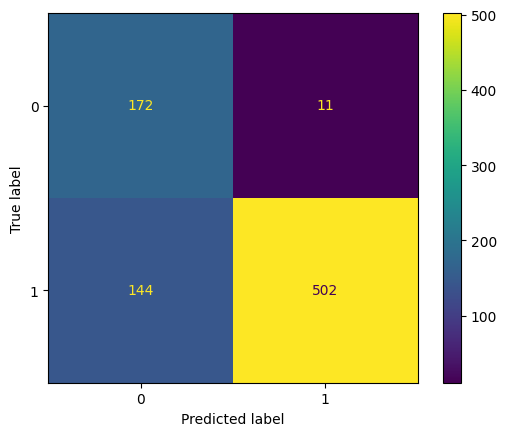

In [ ]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_dt.classes_)
cm_display.plot()
plt.show()

Support Vector Machine (SVM) Classifier


In [ ]:
from sklearn.svm import SVC

# Initialize the SVM model
model_svm = SVC(kernel='linear', C=1.0, random_state=15)

# Train the SVM model on the scaled training data
model_svm.fit(X_train_scl, y_train)

# Accuracy on training and testing data
print("SVM Training Accuracy:", model_svm.score(X_train_scl, y_train))
print("SVM Testing Accuracy:", model_svm.score(X_test_scl, y_test))

# Cross-validation for additional accuracy metric
from sklearn.model_selection import cross_val_score
svm_accuracies = cross_val_score(model_svm, X_train_scl, y_train, cv=10)
print("SVM Cross-Validation Accuracy:", svm_accuracies.mean())


SVM Training Accuracy: 0.984488107549121
SVM Testing Accuracy: 0.9589867310012062
SVM Cross-Validation Accuracy: 0.9337989423641899


Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
model_logreg = LogisticRegression(random_state=15, max_iter=1000)

# Train the model on the scaled training data
model_logreg.fit(X_train_scl, y_train)

# Accuracy on training and testing data
print("Logistic Regression Training Accuracy:", model_logreg.score(X_train_scl, y_train))
print("Logistic Regression Testing Accuracy:", model_logreg.score(X_test_scl, y_test))

# Cross-validation accuracy
logreg_accuracies = cross_val_score(model_logreg, X_train_scl, y_train, cv=10)
print("Logistic Regression Cross-Validation Accuracy:", logreg_accuracies.mean())


Logistic Regression Training Accuracy: 0.9710444674250258
Logistic Regression Testing Accuracy: 0.9372738238841978
Logistic Regression Cross-Validation Accuracy: 0.9260456172213022


Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Initialize the Naive Bayes model
model_nb = MultinomialNB()

# Train the Naive Bayes model on the scaled training data
model_nb.fit(X_train_scl, y_train)

# Accuracy of the model on training and testing data
print("Naive Bayes Training Accuracy:", model_nb.score(X_train_scl, y_train))
print("Naive Bayes Testing Accuracy:", model_nb.score(X_test_scl, y_test))

# Cross-validation for additional accuracy metric
nb_accuracies = cross_val_score(model_nb, X_train_scl, y_train, cv=10)
print("Naive Bayes Cross-Validation Accuracy:", nb_accuracies.mean())


Naive Bayes Training Accuracy: 0.9508790072388832
Naive Bayes Testing Accuracy: 0.9240048250904704
Naive Bayes Cross-Validation Accuracy: 0.9053789861652689
